<a href="https://colab.research.google.com/github/ALAIKBITTUQOH/Ekstraksi_Fitur/blob/main/histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Membuat histogram index...


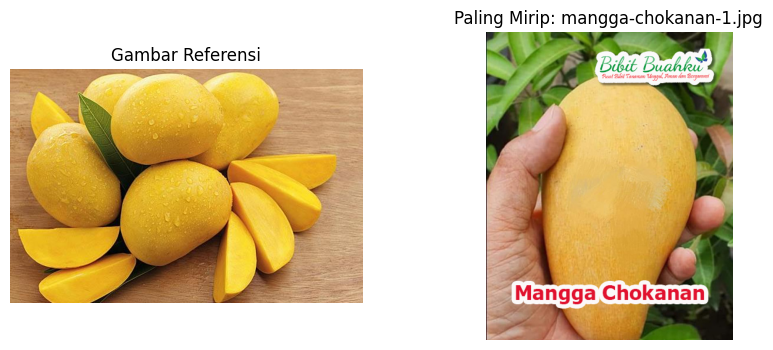

Histogram Referensi:


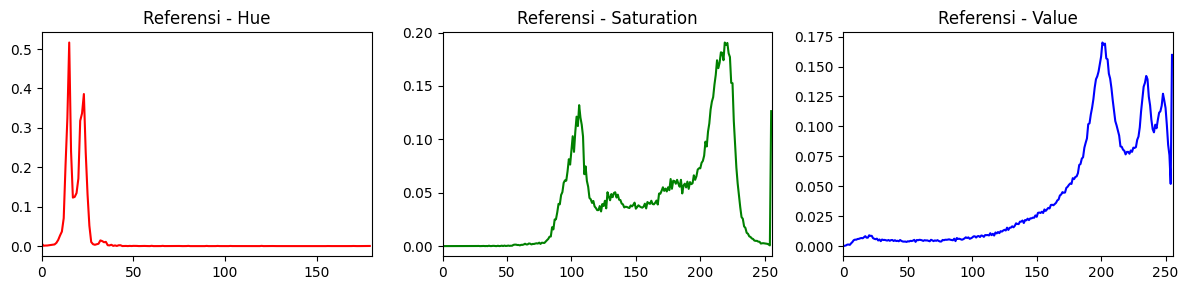

Histogram Paling Mirip:


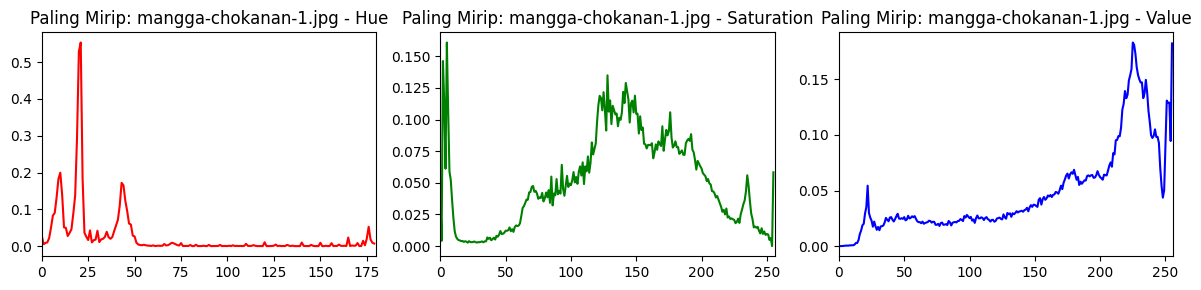

Histogram Index Dataset:

Gambar: buah-mangga.jpg


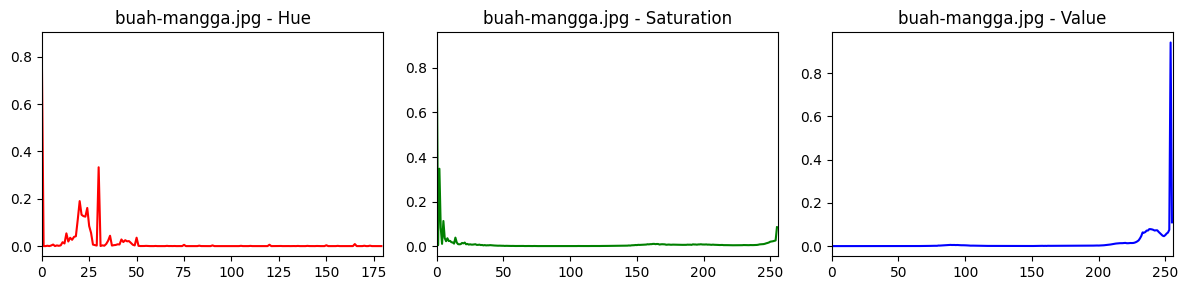


Gambar: mangga.png


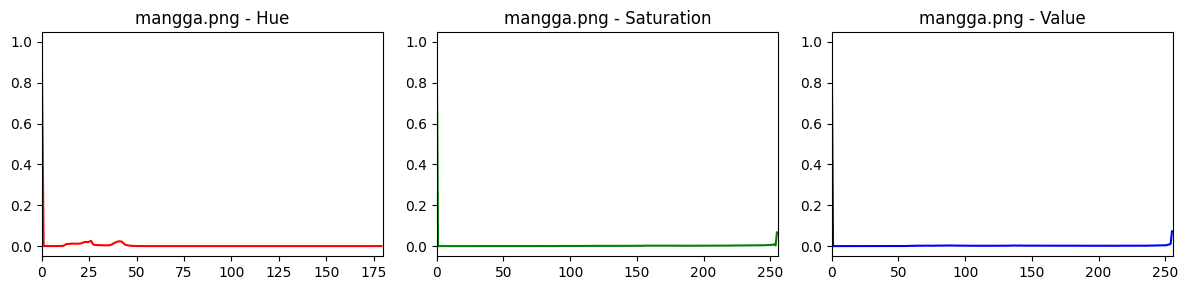


Gambar: WhatsApp Image 2025-05-05 at 12.20.40_64eb017d.jpg


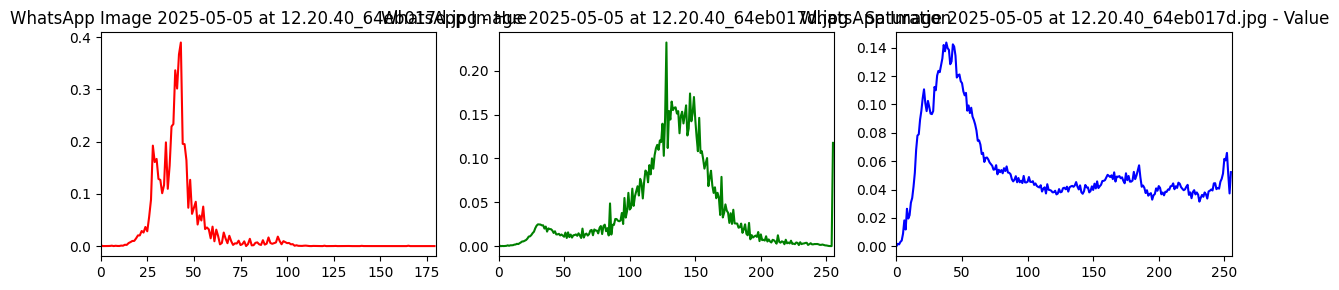


Gambar: oem_mangga_madu_-_kg_full01_46f352f8.jpg


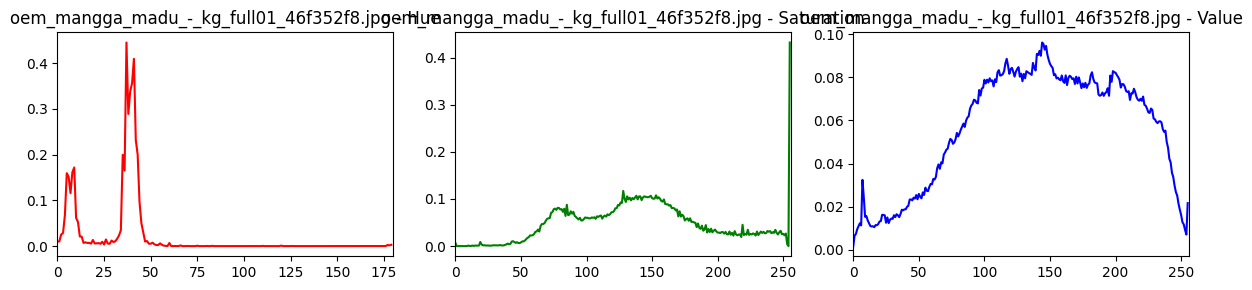


Gambar: Manfaat-Mangga-untuk-Ibu-Hamil.png


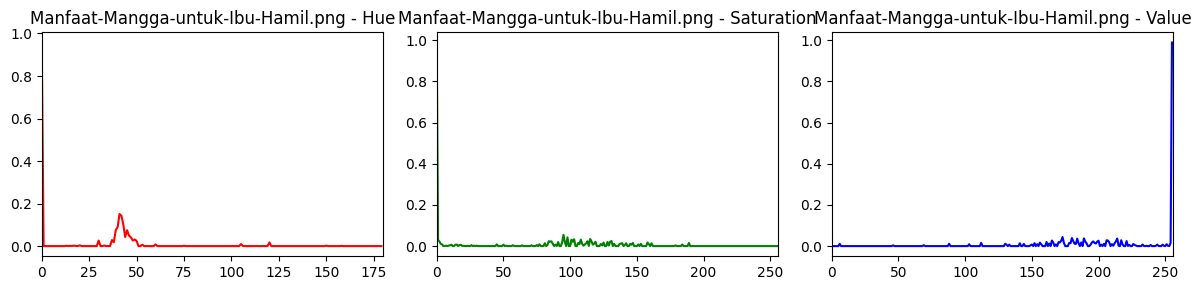


Gambar: tanaman-buah-mangga_169.jpeg


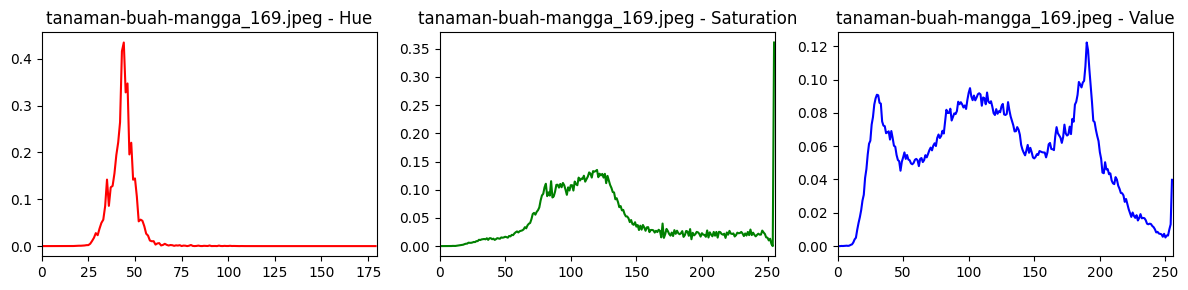


Gambar: istockphoto-511061654-1024x1024.jpg


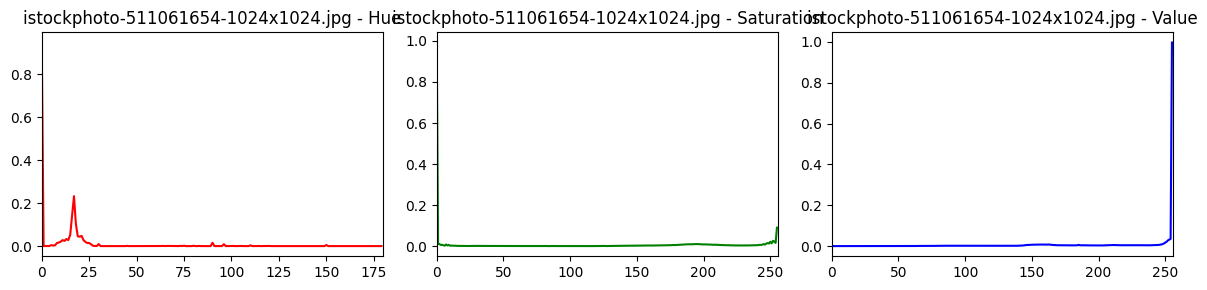


Gambar: xn6dwtlld2ttwpo.jpeg


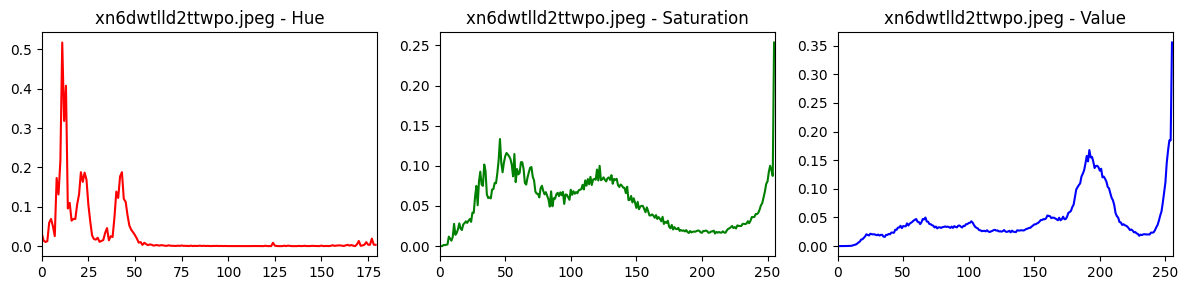


Gambar: depositphotos_77510800-stock-photo-whole-yellow-mangoes.jpg


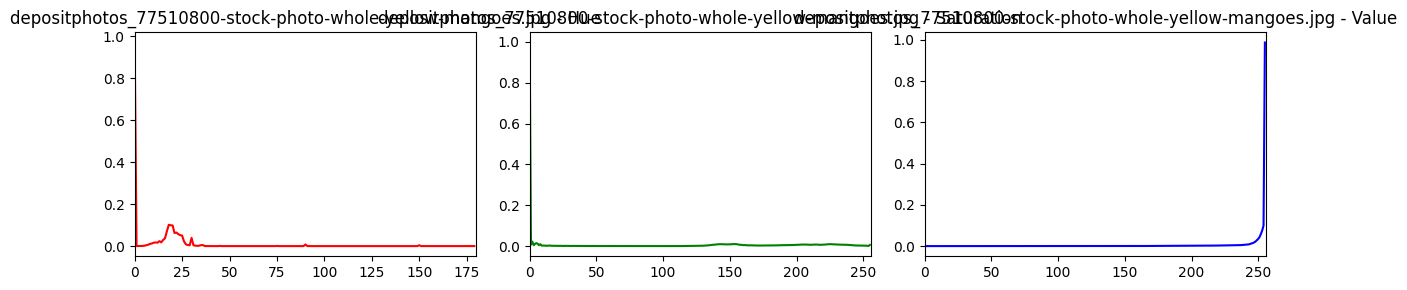


Gambar: mangga-chokanan-1.jpg


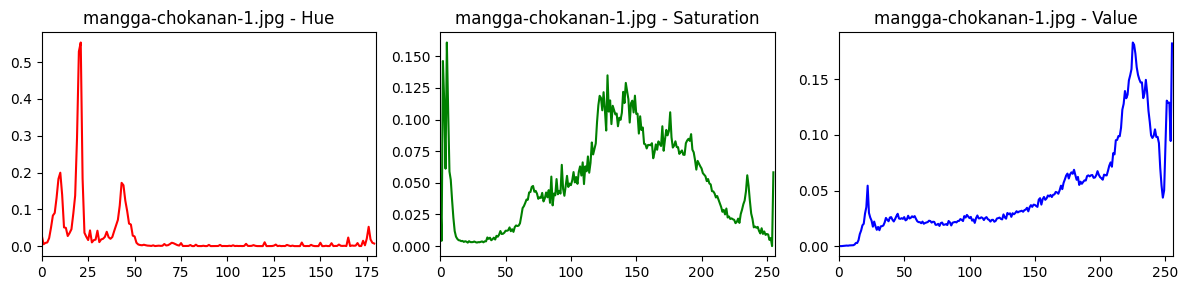


Top 5 Gambar Mirip Berdasarkan Histogram HSV:
1. mangga-chokanan-1.jpg - Similarity: 0.6595
2. xn6dwtlld2ttwpo.jpeg - Similarity: 0.5976
3. oem_mangga_madu_-_kg_full01_46f352f8.jpg - Similarity: 0.4358
4. tanaman-buah-mangga_169.jpeg - Similarity: 0.3561
5. WhatsApp Image 2025-05-05 at 12.20.40_64eb017d.jpg - Similarity: 0.3293


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# === Fungsi menghitung histogram HSV lengkap (H, S, V) ===
def calculate_hsv_histogram(image_path, h_bins=180, s_bins=256, v_bins=256):
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Histogram masing-masing channel
    h_hist = cv2.calcHist([hsv], [0], None, [h_bins], [0, 180])
    s_hist = cv2.calcHist([hsv], [1], None, [s_bins], [0, 256])
    v_hist = cv2.calcHist([hsv], [2], None, [v_bins], [0, 256])

    # Normalisasi dan gabungkan jadi satu vektor
    h_hist = cv2.normalize(h_hist, h_hist).flatten()
    s_hist = cv2.normalize(s_hist, s_hist).flatten()
    v_hist = cv2.normalize(v_hist, v_hist).flatten()

    combined_hist = np.concatenate((h_hist, s_hist, v_hist))
    return combined_hist, h_hist, s_hist, v_hist

# === Fungsi menampilkan histogram 3 channel HSV ===
def plot_hsv_histogram(h, s, v, title):
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    plt.plot(h, color='red')
    plt.title(f'{title} - Hue')
    plt.xlim([0, 180])

    plt.subplot(1, 3, 2)
    plt.plot(s, color='green')
    plt.title(f'{title} - Saturation')
    plt.xlim([0, 256])

    plt.subplot(1, 3, 3)
    plt.plot(v, color='blue')
    plt.title(f'{title} - Value')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

# === Path Gambar dan Folder ===
dataset_folder = 'images'
ref_image_path = 'mangga-kuning.jpg'

# === Ambil semua gambar kecuali referensi ===
image_filenames = [f for f in os.listdir(dataset_folder)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png')) and f != os.path.basename(ref_image_path)]

# === Buat Histogram Index Dataset ===
hist_index = {}
hist_components = {}

print("Membuat histogram index...")
for fname in image_filenames:
    path = os.path.join(dataset_folder, fname)
    full_hist, h, s, v = calculate_hsv_histogram(path)
    hist_index[fname] = full_hist
    hist_components[fname] = (h, s, v)

# === Histogram Referensi ===
ref_hist, ref_h, ref_s, ref_v = calculate_hsv_histogram(ref_image_path)

# === Hitung Cosine Similarity ===
similarities = {}
for fname, hist in hist_index.items():
    sim = cosine_similarity([ref_hist], [hist])[0][0]
    similarities[fname] = sim

sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
top_match_name = sorted_similarities[0][0]

# === Tampilkan Gambar Referensi & Paling Mirip ===
ref_img = cv2.imread(ref_image_path)
ref_img = cv2.cvtColor(ref_img, cv2.COLOR_BGR2RGB)

top_img_path = os.path.join(dataset_folder, top_match_name)
top_img = cv2.imread(top_img_path)
top_img = cv2.cvtColor(top_img, cv2.COLOR_BGR2RGB)

# === Plot Gambar dan Histogram ===
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(ref_img)
plt.title("Gambar Referensi")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(top_img)
plt.title(f"Paling Mirip: {top_match_name}")
plt.axis("off")
plt.show()

# === Plot Histogram HSV Referensi dan Top Match ===
print("Histogram Referensi:")
plot_hsv_histogram(ref_h, ref_s, ref_v, "Referensi")

print("Histogram Paling Mirip:")
top_h, top_s, top_v = hist_components[top_match_name]
plot_hsv_histogram(top_h, top_s, top_v, f"Paling Mirip: {top_match_name}")

# === Tampilkan Histogram Index Semua Gambar Dataset ===
print("Histogram Index Dataset:")
for fname in image_filenames:
    h, s, v = hist_components[fname]
    print(f"\nGambar: {fname}")
    plot_hsv_histogram(h, s, v, fname)

# === Tampilkan Skor Kemiripan Top 5 ===
print("\nTop 5 Gambar Mirip Berdasarkan Histogram HSV:")
for i, (fname, score) in enumerate(sorted_similarities[:5]):
    print(f"{i+1}. {fname} - Similarity: {score:.4f}")

Membuat histogram index...


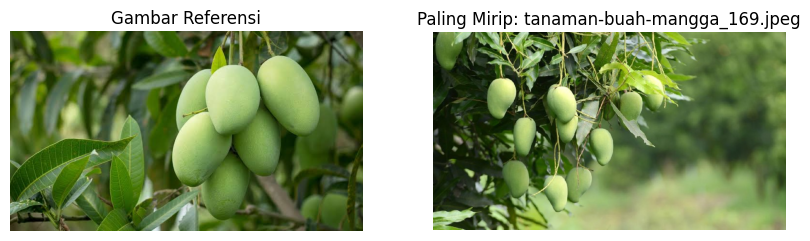

Histogram Referensi:


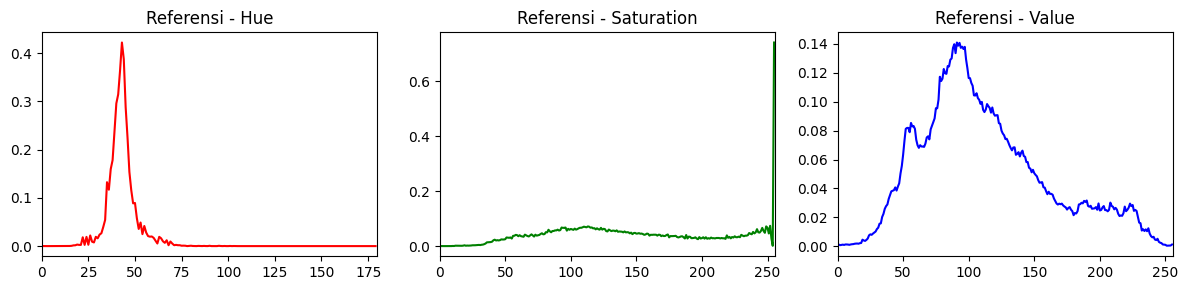

Histogram Paling Mirip:


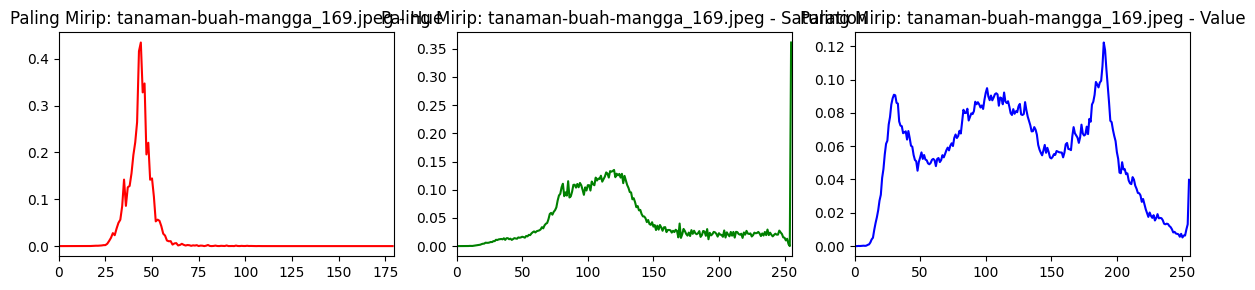

Histogram Index Dataset:

Gambar: buah-mangga.jpg


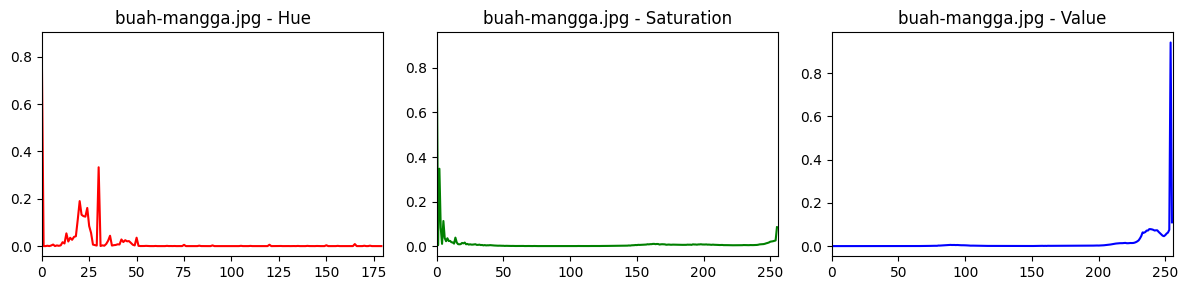


Gambar: mangga.png


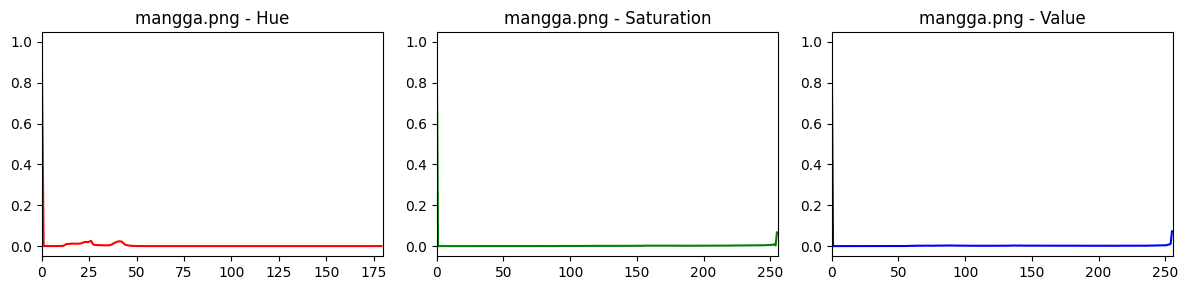


Gambar: WhatsApp Image 2025-05-05 at 12.20.40_64eb017d.jpg


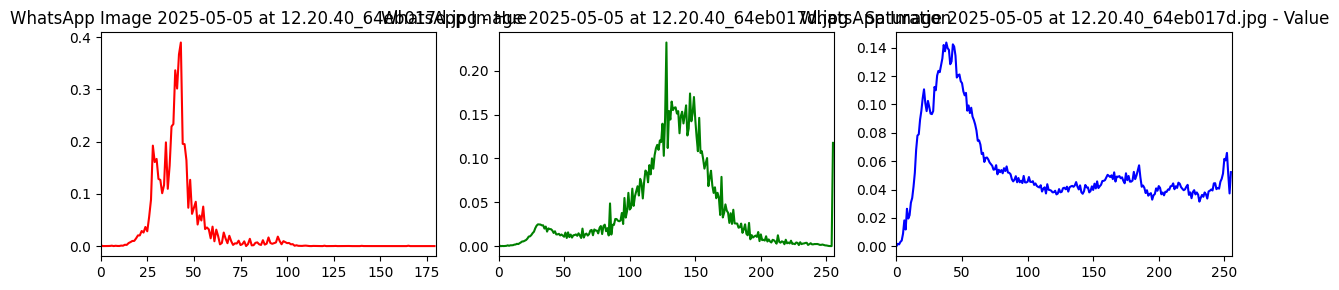


Gambar: oem_mangga_madu_-_kg_full01_46f352f8.jpg


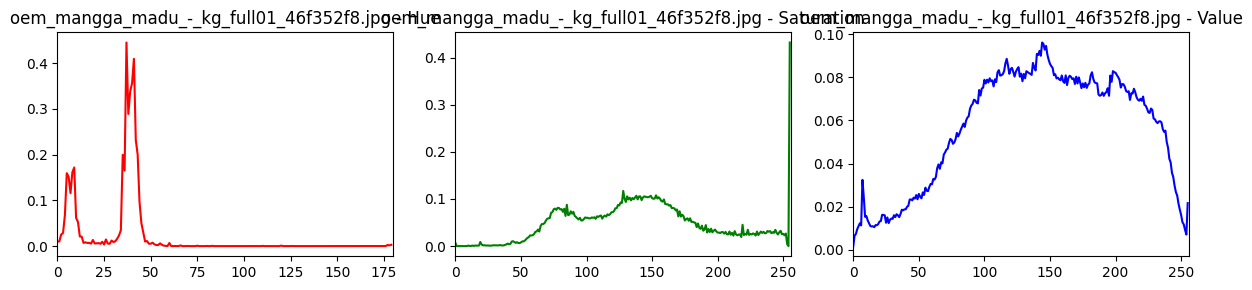


Gambar: Manfaat-Mangga-untuk-Ibu-Hamil.png


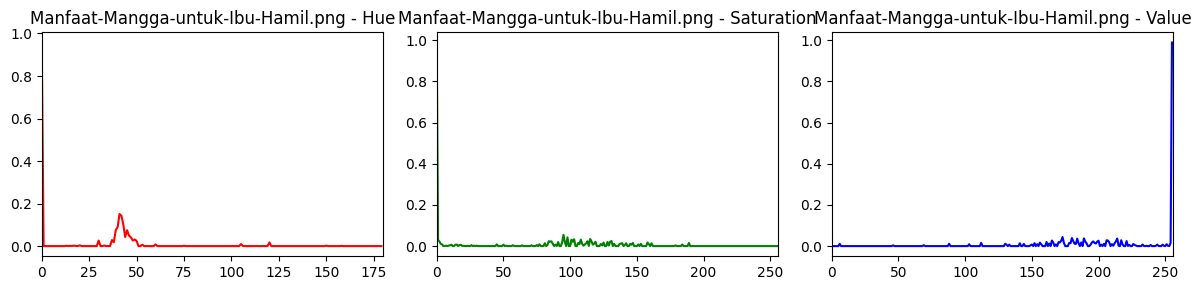


Gambar: tanaman-buah-mangga_169.jpeg


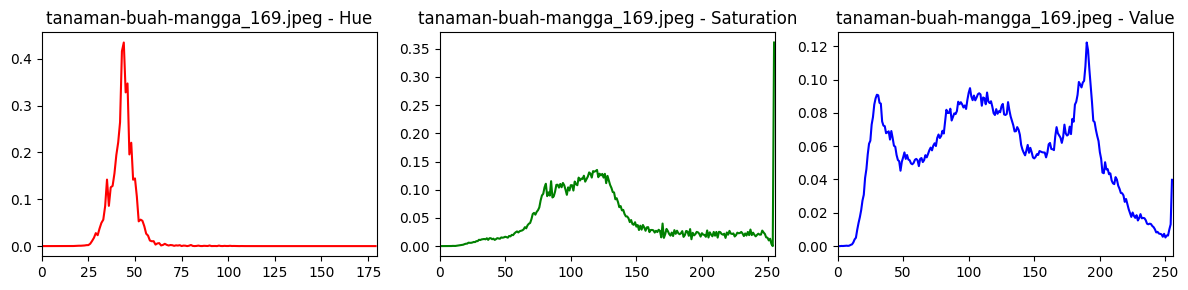


Gambar: istockphoto-511061654-1024x1024.jpg


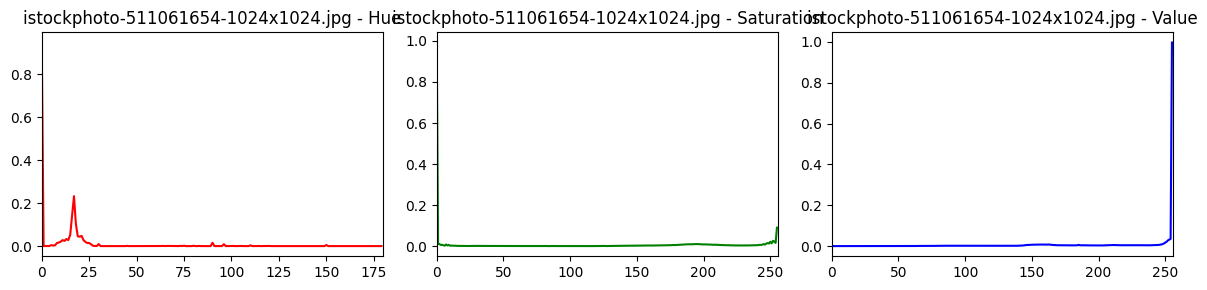


Gambar: xn6dwtlld2ttwpo.jpeg


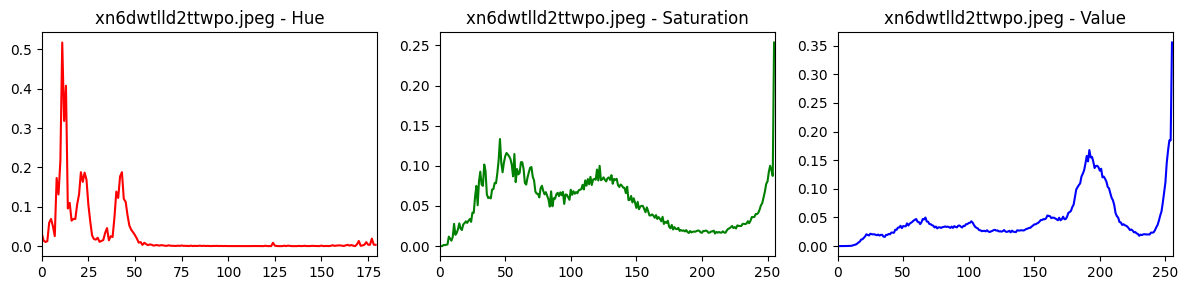


Gambar: depositphotos_77510800-stock-photo-whole-yellow-mangoes.jpg


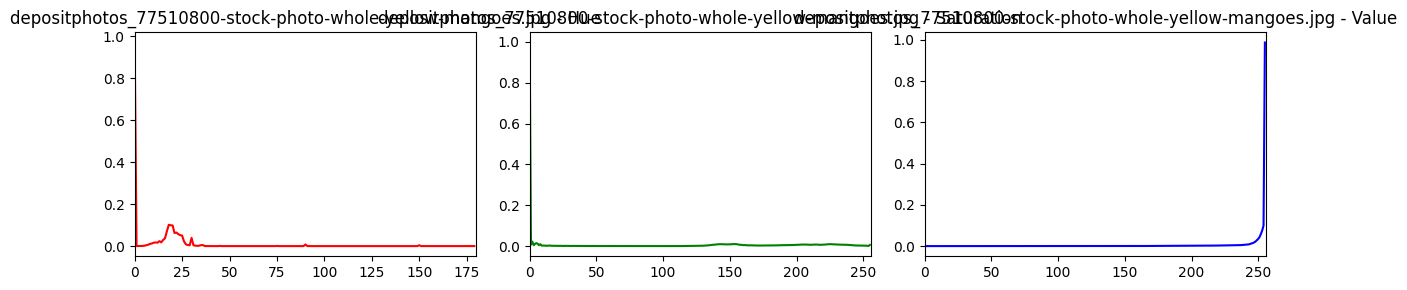


Gambar: mangga-chokanan-1.jpg


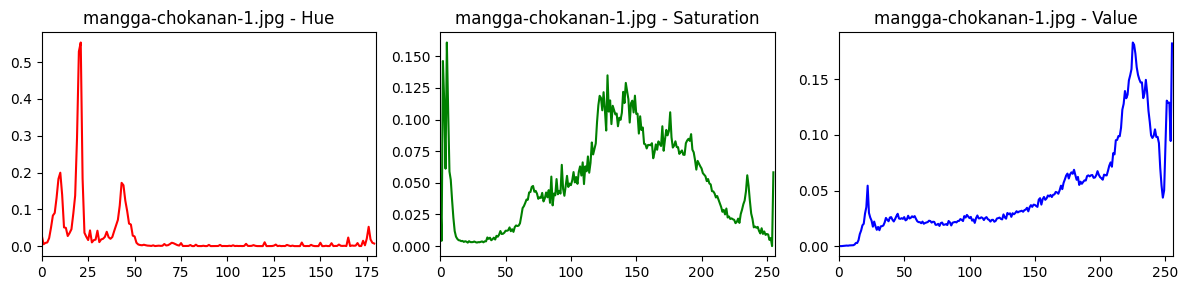


Top 5 Gambar Mirip Berdasarkan Histogram HSV:
1. tanaman-buah-mangga_169.jpeg - Similarity: 0.8832
2. oem_mangga_madu_-_kg_full01_46f352f8.jpg - Similarity: 0.7998
3. WhatsApp Image 2025-05-05 at 12.20.40_64eb017d.jpg - Similarity: 0.7218
4. xn6dwtlld2ttwpo.jpeg - Similarity: 0.5443
5. mangga-chokanan-1.jpg - Similarity: 0.4533


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# === Fungsi menghitung histogram HSV lengkap (H, S, V) ===
def calculate_hsv_histogram(image_path, h_bins=180, s_bins=256, v_bins=256):
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Histogram masing-masing channel
    h_hist = cv2.calcHist([hsv], [0], None, [h_bins], [0, 180])
    s_hist = cv2.calcHist([hsv], [1], None, [s_bins], [0, 256])
    v_hist = cv2.calcHist([hsv], [2], None, [v_bins], [0, 256])

    # Normalisasi dan gabungkan jadi satu vektor
    h_hist = cv2.normalize(h_hist, h_hist).flatten()
    s_hist = cv2.normalize(s_hist, s_hist).flatten()
    v_hist = cv2.normalize(v_hist, v_hist).flatten()

    combined_hist = np.concatenate((h_hist, s_hist, v_hist))
    return combined_hist, h_hist, s_hist, v_hist

# === Fungsi menampilkan histogram 3 channel HSV ===
def plot_hsv_histogram(h, s, v, title):
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 3, 1)
    plt.plot(h, color='red')
    plt.title(f'{title} - Hue')
    plt.xlim([0, 180])

    plt.subplot(1, 3, 2)
    plt.plot(s, color='green')
    plt.title(f'{title} - Saturation')
    plt.xlim([0, 256])

    plt.subplot(1, 3, 3)
    plt.plot(v, color='blue')
    plt.title(f'{title} - Value')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()

# === Path Gambar dan Folder ===
dataset_folder = 'images'
ref_image_path = 'mangga-hijau.jpg'

# === Ambil semua gambar kecuali referensi ===
image_filenames = [f for f in os.listdir(dataset_folder)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png')) and f != os.path.basename(ref_image_path)]

# === Buat Histogram Index Dataset ===
hist_index = {}
hist_components = {}

print("Membuat histogram index...")
for fname in image_filenames:
    path = os.path.join(dataset_folder, fname)
    full_hist, h, s, v = calculate_hsv_histogram(path)
    hist_index[fname] = full_hist
    hist_components[fname] = (h, s, v)

# === Histogram Referensi ===
ref_hist, ref_h, ref_s, ref_v = calculate_hsv_histogram(ref_image_path)

# === Hitung Cosine Similarity ===
similarities = {}
for fname, hist in hist_index.items():
    sim = cosine_similarity([ref_hist], [hist])[0][0]
    similarities[fname] = sim

sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
top_match_name = sorted_similarities[0][0]

# === Tampilkan Gambar Referensi & Paling Mirip ===
ref_img = cv2.imread(ref_image_path)
ref_img = cv2.cvtColor(ref_img, cv2.COLOR_BGR2RGB)

top_img_path = os.path.join(dataset_folder, top_match_name)
top_img = cv2.imread(top_img_path)
top_img = cv2.cvtColor(top_img, cv2.COLOR_BGR2RGB)

# === Plot Gambar dan Histogram ===
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(ref_img)
plt.title("Gambar Referensi")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(top_img)
plt.title(f"Paling Mirip: {top_match_name}")
plt.axis("off")
plt.show()

# === Plot Histogram HSV Referensi dan Top Match ===
print("Histogram Referensi:")
plot_hsv_histogram(ref_h, ref_s, ref_v, "Referensi")

print("Histogram Paling Mirip:")
top_h, top_s, top_v = hist_components[top_match_name]
plot_hsv_histogram(top_h, top_s, top_v, f"Paling Mirip: {top_match_name}")

# === Tampilkan Histogram Index Semua Gambar Dataset ===
print("Histogram Index Dataset:")
for fname in image_filenames:
    h, s, v = hist_components[fname]
    print(f"\nGambar: {fname}")
    plot_hsv_histogram(h, s, v, fname)

# === Tampilkan Skor Kemiripan Top 5 ===
print("\nTop 5 Gambar Mirip Berdasarkan Histogram HSV:")
for i, (fname, score) in enumerate(sorted_similarities[:5]):
    print(f"{i+1}. {fname} - Similarity: {score:.4f}")

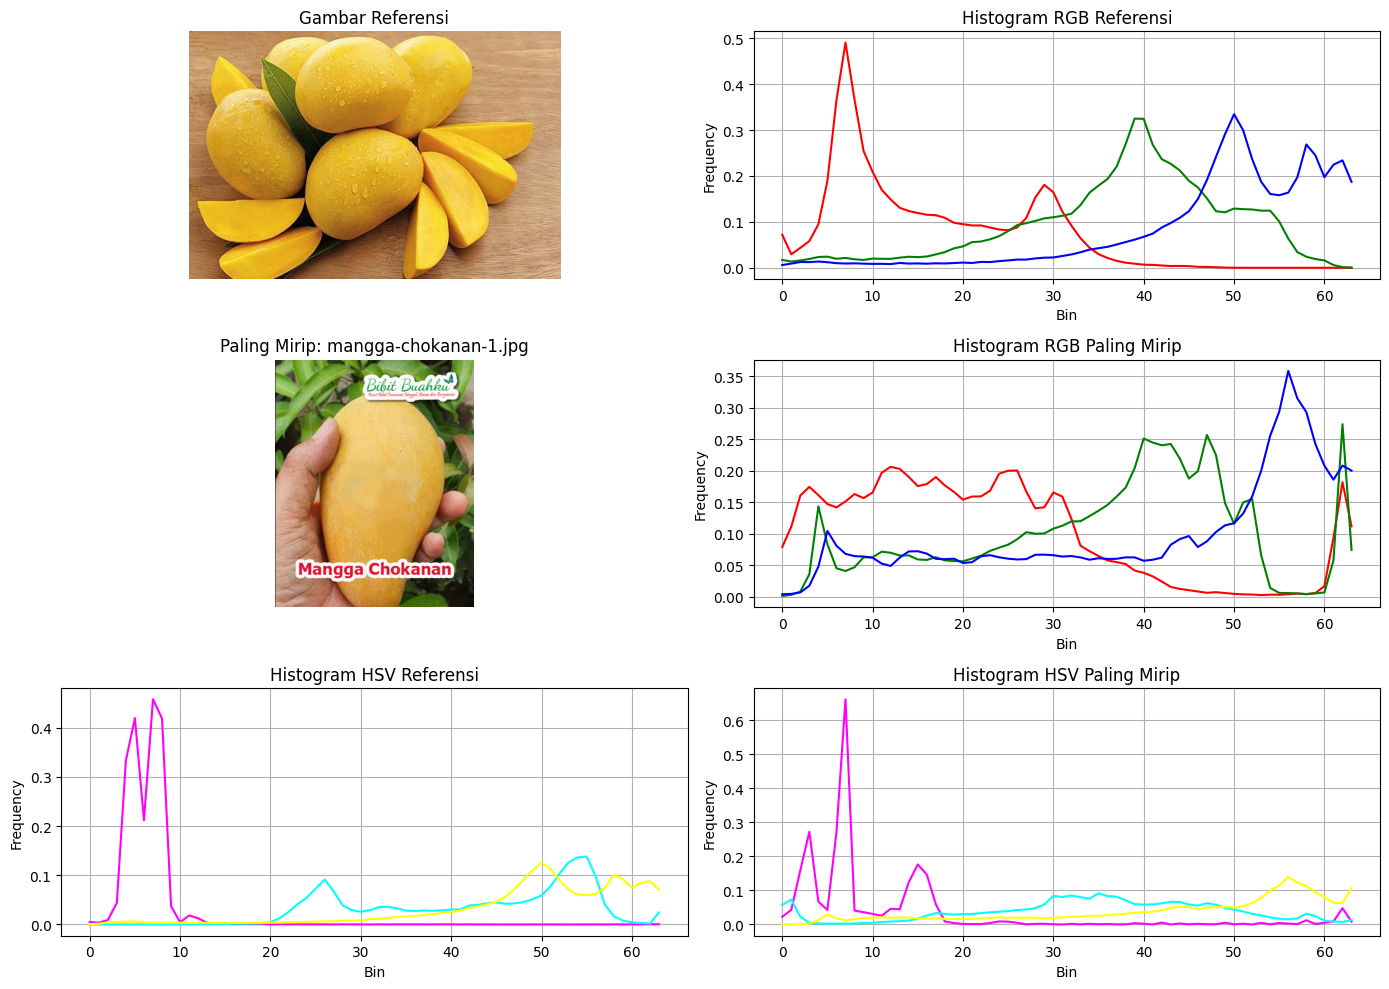


Histogram Index (RGB) untuk semua gambar dataset:


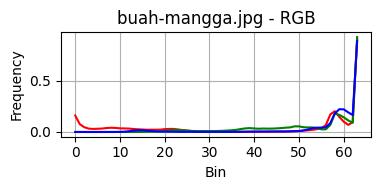

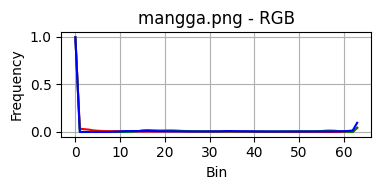

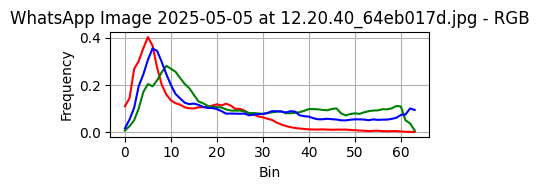

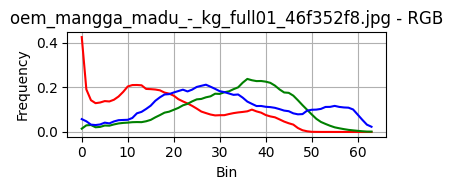

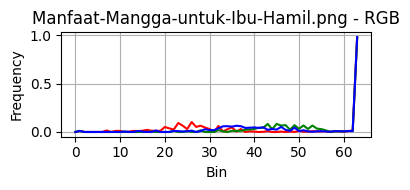

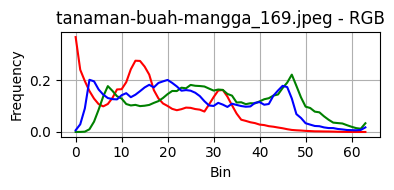

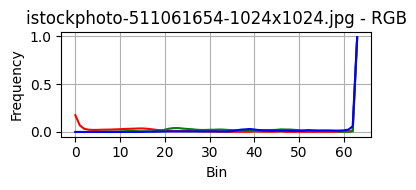

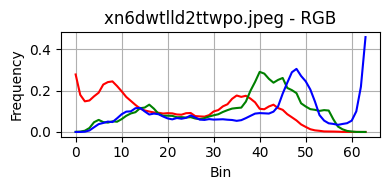

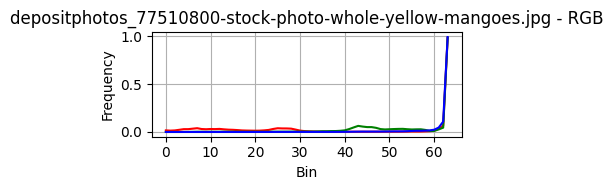

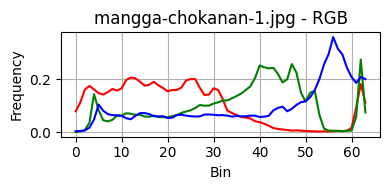

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Folder dataset dan referensi
dataset_folder = 'images'
ref_image_path = 'mangga-kuning.jpg'  # ganti jika perlu

# ======== Fungsi Histogram HSV & RGB ==========
def calculate_hsv_histogram(image_path, bins=64):
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist_h = cv2.calcHist([hsv], [0], None, [bins], [0, 180])
    hist_s = cv2.calcHist([hsv], [1], None, [bins], [0, 256])
    hist_v = cv2.calcHist([hsv], [2], None, [bins], [0, 256])
    hist = np.concatenate([hist_h, hist_s, hist_v])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

def calculate_rgb_histogram(image_path, bins=64):
    image = cv2.imread(image_path)
    chans = cv2.split(image)
    colors = ('b', 'g', 'r')
    features = []
    for chan in chans:
        hist = cv2.calcHist([chan], [0], None, [bins], [0, 256])
        features.append(hist)
    features = [cv2.normalize(h, h).flatten() for h in features]
    return features  # list of B, G, R histograms

# ======== Visualisasi Histogram ==========
def plot_histogram_set(hist_list, color_list, title, bins=64):
    for hist, color in zip(hist_list, color_list):
        plt.plot(hist, color=color)
    plt.title(title)
    plt.xlabel("Bin")
    plt.ylabel("Frequency")
    plt.grid(True)

# ======== Bangun Index Gambar Dataset ==========
image_filenames = [f for f in os.listdir(dataset_folder)
                   if f.lower().endswith(('.jpg', '.png', '.jpeg')) and f != os.path.basename(ref_image_path)]

hist_index = {}
for filename in image_filenames:
    path = os.path.join(dataset_folder, filename)
    hist = calculate_hsv_histogram(path)
    hist_index[filename] = hist

# ======== Histogram Referensi ==========
ref_hist = calculate_hsv_histogram(ref_image_path)

# ======== Cari Kemiripan Histogram ==========
similarities = {}
for filename, hist in hist_index.items():
    sim = cosine_similarity([ref_hist], [hist])[0][0]
    similarities[filename] = sim

sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
top_match_name = sorted_similarities[0][0]

# ======== Load Gambar Referensi dan Hasil ==========
ref_img = cv2.imread(ref_image_path)
ref_img_rgb = cv2.cvtColor(ref_img, cv2.COLOR_BGR2RGB)
top_match_path = os.path.join(dataset_folder, top_match_name)
top_img = cv2.imread(top_match_path)
top_img_rgb = cv2.cvtColor(top_img, cv2.COLOR_BGR2RGB)

# ======== Tampilkan Gambar dan Histogram HSV & RGB ==========
plt.figure(figsize=(14, 10))

# -- Gambar Referensi dan Histogramnya
plt.subplot(3, 2, 1)
plt.imshow(ref_img_rgb)
plt.title("Gambar Referensi")
plt.axis("off")

plt.subplot(3, 2, 2)
ref_hsv = calculate_hsv_histogram(ref_image_path)
ref_rgb = calculate_rgb_histogram(ref_image_path)
plot_histogram_set(ref_rgb, ['r', 'g', 'b'], "Histogram RGB Referensi")

# -- Gambar Paling Mirip dan Histogramnya
plt.subplot(3, 2, 3)
plt.imshow(top_img_rgb)
plt.title(f"Paling Mirip: {top_match_name}")
plt.axis("off")

plt.subplot(3, 2, 4)
top_rgb = calculate_rgb_histogram(top_match_path)
plot_histogram_set(top_rgb, ['r', 'g', 'b'], "Histogram RGB Paling Mirip")

# -- Histogram HSV (gabungan H, S, V) Visualisasi
plt.subplot(3, 2, 5)
ref_h = ref_hsv[:64]
ref_s = ref_hsv[64:128]
ref_v = ref_hsv[128:]
plot_histogram_set([ref_h, ref_s, ref_v], ['magenta', 'cyan', 'yellow'], "Histogram HSV Referensi")

plt.subplot(3, 2, 6)
top_hsv = calculate_hsv_histogram(top_match_path)
top_h = top_hsv[:64]
top_s = top_hsv[64:128]
top_v = top_hsv[128:]
plot_histogram_set([top_h, top_s, top_v], ['magenta', 'cyan', 'yellow'], "Histogram HSV Paling Mirip")

plt.tight_layout()
plt.show()

# ======== Tampilkan Histogram Index Semua Gambar Dataset (RGB) ==========
print("\nHistogram Index (RGB) untuk semua gambar dataset:")

for filename in image_filenames:
    path = os.path.join(dataset_folder, filename)
    rgb = calculate_rgb_histogram(path)

    plt.figure(figsize=(4, 2))
    plot_histogram_set(rgb, ['r', 'g', 'b'], f"{filename} - RGB")
    plt.tight_layout()
    plt.show()